In [27]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = [ 'T-shirt/top,', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot' ]


2.3.1


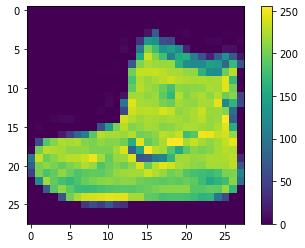

In [28]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [29]:
train_images = train_images / 255
test_images = test_images / 255

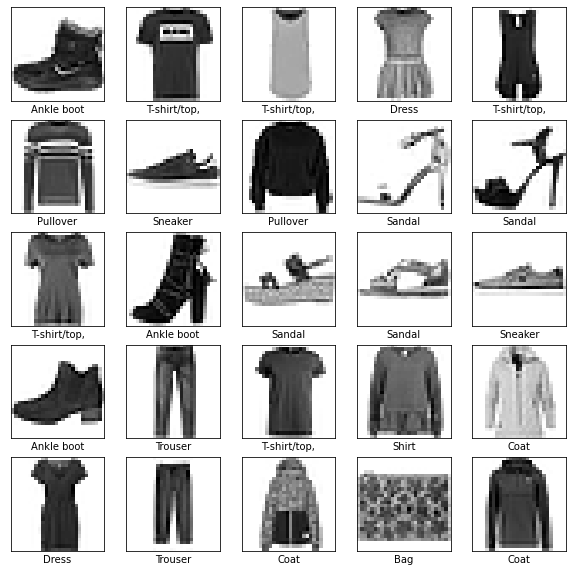

In [30]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [31]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [32]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [33]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 1s 765us/step - loss: 0.4978 - accuracy: 0.8257
Epoch 2/10
1875/1875 [==============================] - 1s 775us/step - loss: 0.3759 - accuracy: 0.8654
Epoch 3/10
1875/1875 [==============================] - 1s 765us/step - loss: 0.3369 - accuracy: 0.8780
Epoch 4/10
1875/1875 [==============================] - 1s 770us/step - loss: 0.3144 - accuracy: 0.8840
Epoch 5/10
1875/1875 [==============================] - 1s 771us/step - loss: 0.2950 - accuracy: 0.8913
Epoch 6/10
1875/1875 [==============================] - 1s 781us/step - loss: 0.2797 - accuracy: 0.8959
Epoch 7/10
1875/1875 [==============================] - 1s 771us/step - loss: 0.2662 - accuracy: 0.9017
Epoch 8/10
1875/1875 [==============================] - 1s 766us/step - loss: 0.2571 - accuracy: 0.9042
Epoch 9/10
1875/1875 [==============================] - 1s 790us/step - loss: 0.2448 - accuracy: 0.9081
Epoch 10/10
1875/1875 [==============================] - 1s 768u

In [34]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\nTest Accuracy: ', test_acc)

313/313 - 0s - loss: 0.3423 - accuracy: 0.8812

Test Accuracy:  0.8812000155448914


In [38]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

In [39]:
np.argmax(predictions[0])
test_labels[0]

9

In [40]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if(predicted_label == true_label):
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 100*np.max(predictions_array), class_names[true_label]), color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color = 'red'
    thisplot[true_label].set_color = 'blue'

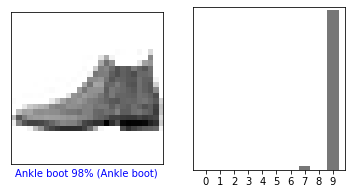

In [41]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

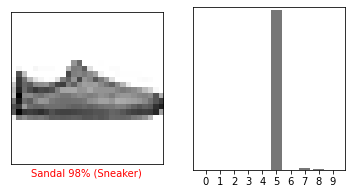

In [42]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

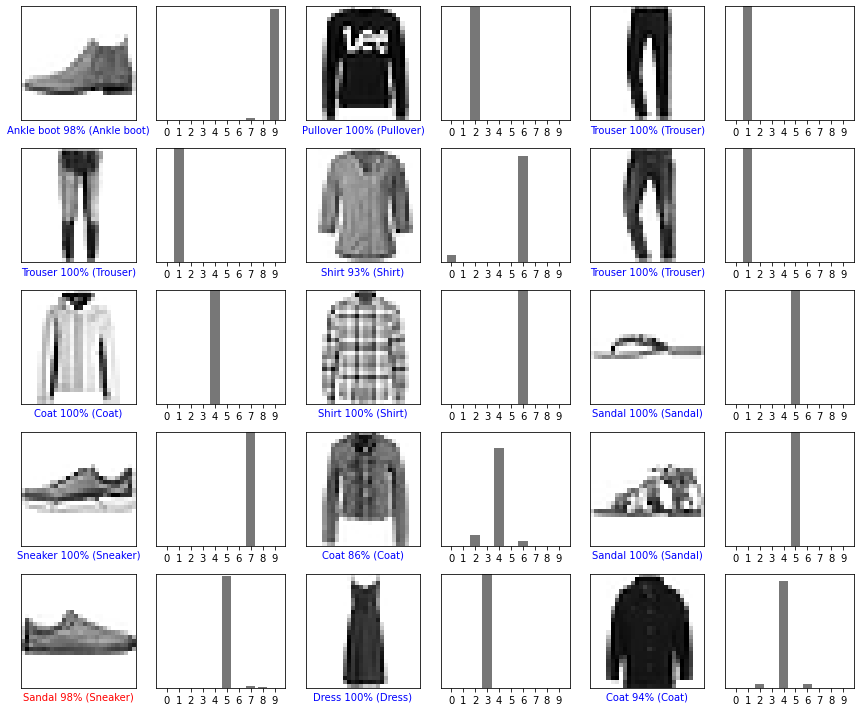

In [44]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i + 1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i + 2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [45]:
img = test_images[1]

print(img.shape)

(28, 28)


In [46]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [47]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[5.1283710e-06 3.4196029e-13 9.9830651e-01 9.9582198e-10 9.5141900e-04
  2.9363388e-13 7.3693029e-04 2.2431409e-19 4.5367859e-12 7.3829501e-18]]


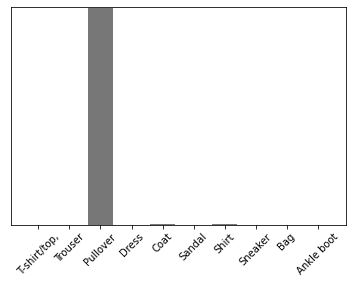

In [49]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation = 45)

In [50]:
np.argmax(predictions_single[0])

2